In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Input.xlsx')

In [39]:
df

,Day,Mood,Activity-1,Activity-2
0,Monday,Sad,Work,Heavy Workload
1,Tuesday,Sad,Relationships,Argument
2,Wednesday,Lonely,Routine,Daily Monotony
3,Thursday,Neutral,Routine,Daily Monotony
4,Friday,Happy,Leisure,Friends Gathering
...,...,...,...,...
100,Wednesday,Lonely,Relationships,Argument
101,Thursday,Neutral,Routine,Busy Schedule
102,Friday,Happy,Leisure,Relaxing
103,Saturday,Happy,Leisure,Relaxing


In [4]:
print(df.head())

         Day     Mood     Activity-1         Activity-2
0     Monday      Sad           Work     Heavy Workload
1    Tuesday      Sad  Relationships           Argument
2  Wednesday   Lonely        Routine     Daily Monotony
3   Thursday  Neutral        Routine     Daily Monotony
4     Friday    Happy        Leisure  Friends Gathering


In [5]:
print(df.shape)

(105, 4)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         105 non-null    object
 1   Mood        105 non-null    object
 2   Activity-1  105 non-null    object
 3   Activity-2  105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB
None


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Mood')

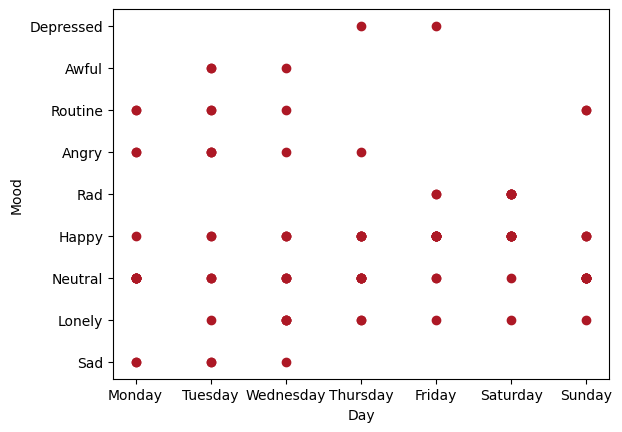

In [35]:
plt.scatter(df['Day'], df['Mood'], color = '#ad1825')
plt.xlabel('Day')
plt.ylabel('Mood')

Text(0, 0.5, 'Activity-1')

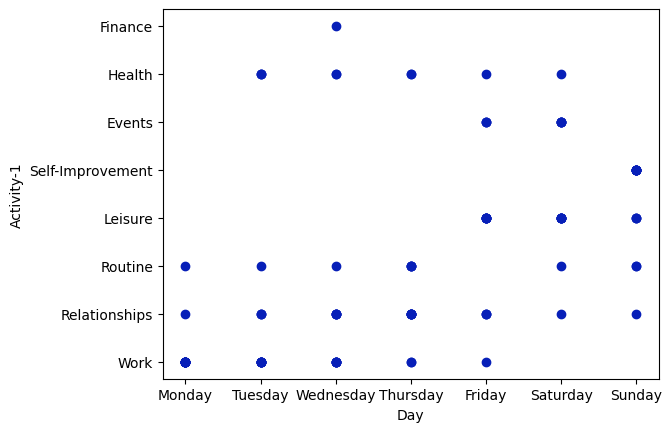

In [38]:
plt.scatter(df['Day'], df['Activity-1'], color='#071fb8')
plt.xlabel('Day')
plt.ylabel('Activity-1')

Text(0, 0.5, 'Activity-1')

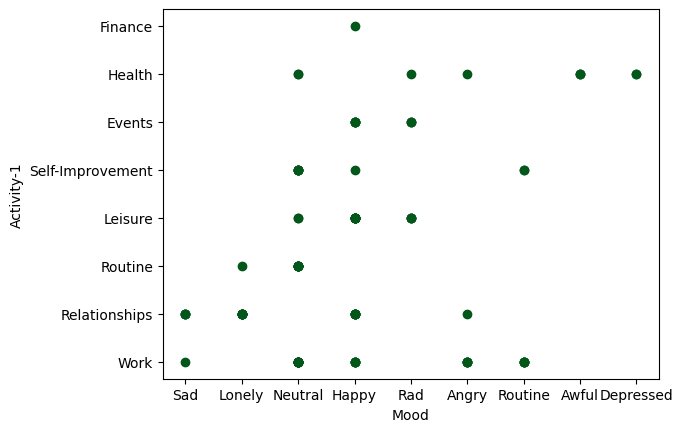

In [37]:
plt.scatter(df['Mood'], df['Activity-1'], color='#03571a')
plt.xlabel('Mood')
plt.ylabel('Activity-1')

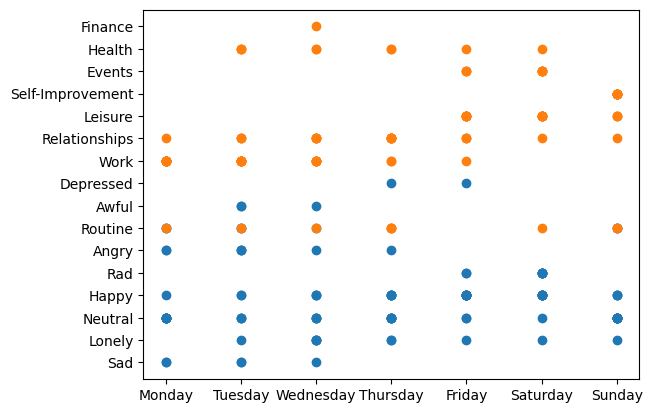

In [27]:
plt.scatter(df['Day'], df['Mood'])
plt.scatter(df['Day'], df['Activity-1'])

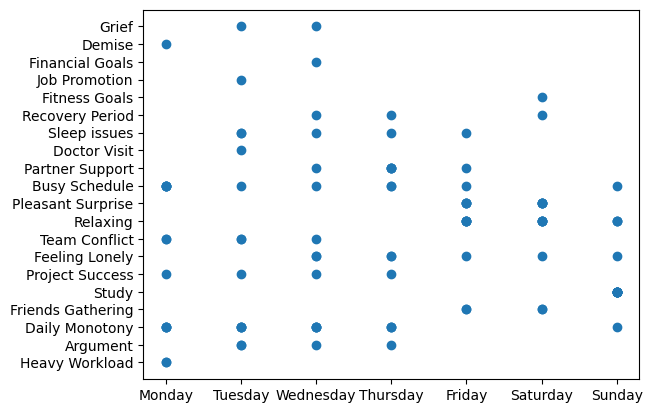

In [14]:
plt.scatter(df['Day'], df['Activity-2'])

In [203]:
activity1_list = list(set(df['Activity-1']))
activity1_list

[0, 1, 2, 3, 4, 5, 6, 7]

In [79]:

from sklearn.preprocessing import LabelEncoder


In [139]:
label_encoder = LabelEncoder()

df['activity_1_encoded'] = label_encoder.fit_transform(df['Activity-1'])

df['mood_encoded'] = label_encoder.fit_transform(df['Mood'])

df['day_encoded'] = label_encoder.fit_transform(df['Day'])

df['activity_2_encoded'] = label_encoder.fit_transform(df['Activity-2'])



In [141]:


T = df.iloc[:,4:-2]
T

,mood_encoded,day_encoded
0,8,1
1,8,5
2,4,6
3,5,4
4,3,0
...,...,...
100,4,6
101,5,4
102,3,0
103,3,2


In [143]:
G = df.iloc[:,2:-5]
G

,Activity-1
0,7
1,4
2,5
3,5
4,3
...,...
100,4
101,5
102,3
103,3


In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(T, G, test_size=0.2, random_state=42)

In [145]:
X_train

,mood_encoded,day_encoded
55,3,3
22,7,5
76,7,3
44,5,6
72,3,6
...,...,...
71,3,5
14,0,1
92,8,5
51,5,6


In [146]:
y_train

,Activity-1
55,3
22,7
76,6
44,2
72,1
...,...
71,7
14,7
92,4
51,7


In [147]:
X_test

,mood_encoded,day_encoded
30,3,6
65,5,6
64,0,5
53,3,0
45,5,4
94,2,4
104,5,3
47,3,2
10,4,4
0,8,1


In [148]:
y_test

,Activity-1
30,4
65,7
64,7
53,4
45,5
94,2
104,6
47,0
10,4
0,7


In [135]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6041666666666666, 0.9, 'x[1] <= 3.5\ngini = 0.82\nsamples = 84\nvalue = [6, 1, 8, 13, 14, 8, 8, 26]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 2.5\ngini = 0.808\nsamples = 48\nvalue = [6, 0, 2, 13, 4, 3, 8, 12]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 1.5\ngini = 0.746\nsamples = 34\nvalue = [6, 0, 2, 10, 3, 1, 0, 12]'),
 Text(0.08333333333333333, 0.3, 'x[1] <= 0.5\ngini = 0.698\nsamples = 25\nvalue = [3, 0, 1, 5, 3, 1, 0, 12]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.722\nsamples = 12\nvalue = [3, 0, 1, 5, 2, 0, 0, 1]'),
 Text(0.125, 0.1, 'gini = 0.272\nsamples = 13\nvalue = [0, 0, 0, 0, 1, 1, 0, 11]'),
 Text(0.25, 0.3, 'x[0] <= 4.5\ngini = 0.568\nsamples = 9\nvalue = [3, 0, 1, 5, 0, 0, 0, 0]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [2, 0, 0, 3, 0, 0, 0, 0]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.625\nsamples = 4\nvalue = [1, 0, 1, 2, 0, 0, 0, 0]'),
 Text(0.5, 0.5, 'x[0] <= 4.5\ngini = 0.602\nsamples = 14\nvalue = [0, 0, 0, 3, 1, 2, 8, 0

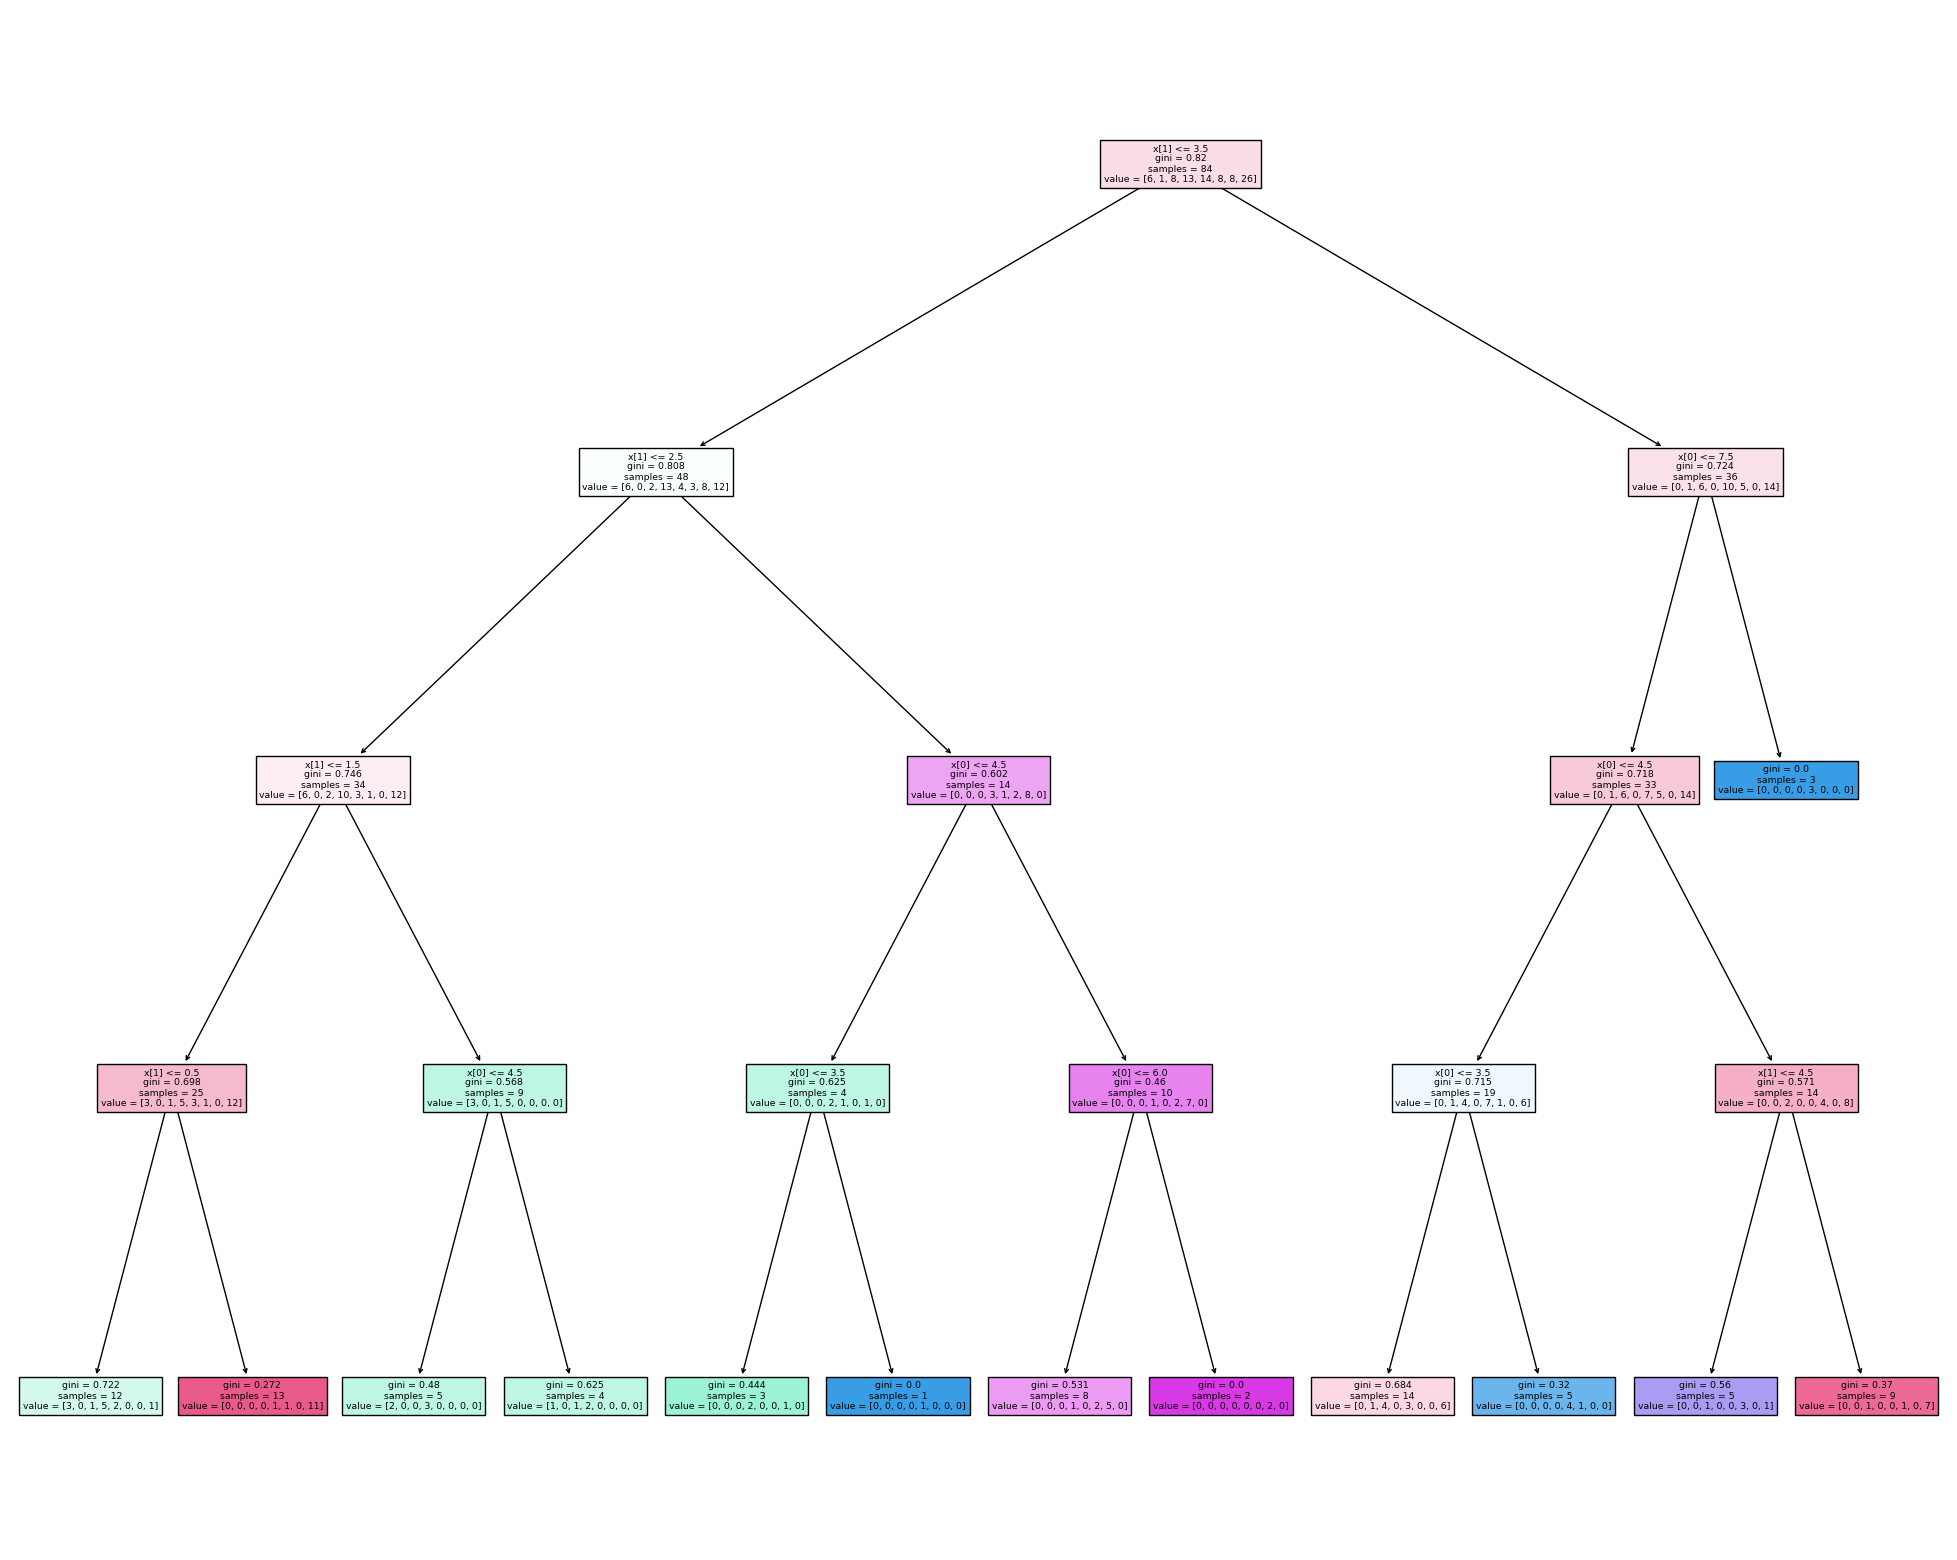

In [149]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)

In [150]:
y_pred = clf.predict(X_test)

In [175]:
y_pred

array([ 2, 16, 16, 17,  2,  2,  2, 13, 14,  2,  5,  5,  2, 13, 13, 17,  5,
       16, 16, 16,  2])

In [151]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


In [152]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.44      0.62         9
           4       0.29      1.00      0.44         2
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         8

    accuracy                           0.57        21
   macro avg       0.54      0.56      0.48        21
weighted avg       0.91      0.57      0.64        21



In [154]:
A = df.iloc[:,4:-1]
A

,mood_encoded,day_encoded,activity_1_encoded
0,8,1,7
1,8,5,4
2,4,6,5
3,5,4,5
4,3,0,3
...,...,...,...
100,4,6,4
101,5,4,5
102,3,0,3
103,3,2,3


In [157]:
B = df.iloc[:,7:]
B

,activity_2_encoded
0,10
1,0
2,2
3,2
4,8
...,...
100,0
101,1
102,16
103,16


In [206]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [207]:
A_train


,mood_encoded,day_encoded,activity_1_encoded
55,3,3,3
22,7,5,7
76,7,3,6
44,5,6,2
72,3,6,1
...,...,...,...
71,3,5,7
14,0,1,7
92,8,5,4
51,5,6,7


In [208]:

B_train

,activity_2_encoded
55,16
22,2
76,18
44,15
72,6
...,...
71,11
14,19
92,9
51,2


In [209]:
A_test

,mood_encoded,day_encoded,activity_1_encoded
30,3,6,4
65,5,6,7
64,0,5,7
53,3,0,4
45,5,4,5
94,2,4,2
104,5,3,6
47,3,2,0
10,4,4,4
0,8,1,7


In [210]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(A_train, B_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.4356060606060606, 0.9166666666666666, 'x[2] <= 4.5\ngini = 0.911\nsamples = 84\nvalue = [3, 10, 14, 1, 1, 5, 1, 1, 2, 2, 1, 1, 3, 6\n4, 2, 11, 4, 8, 4]'),
 Text(0.21212121212121213, 0.75, 'x[2] <= 0.5\ngini = 0.868\nsamples = 42\nvalue = [3, 0, 0, 1, 1, 5, 1, 1, 2, 2, 0, 0, 3, 6\n0, 2, 11, 4, 0, 0]'),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6\n0, 0, 0, 0, 0, 0]'),
 Text(0.24242424242424243, 0.5833333333333334, 'x[2] <= 3.5\ngini = 0.849\nsamples = 36\nvalue = [3, 0, 0, 1, 1, 5, 1, 1, 2, 2, 0, 0, 3, 0\n0, 2, 11, 4, 0, 0]'),
 Text(0.12121212121212122, 0.4166666666666667, 'x[2] <= 2.5\ngini = 0.694\nsamples = 22\nvalue = [0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0\n0, 2, 11, 4, 0, 0]'),
 Text(0.06060606060606061, 0.25, 'x[0] <= 2.5\ngini = 0.716\nsamples = 9\nvalue = [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0\n0, 2, 0, 4, 0, 0]'),
 Text(0.030303030303030304, 0.08333333333333333, 'gini = 0.32\nsamples = 5

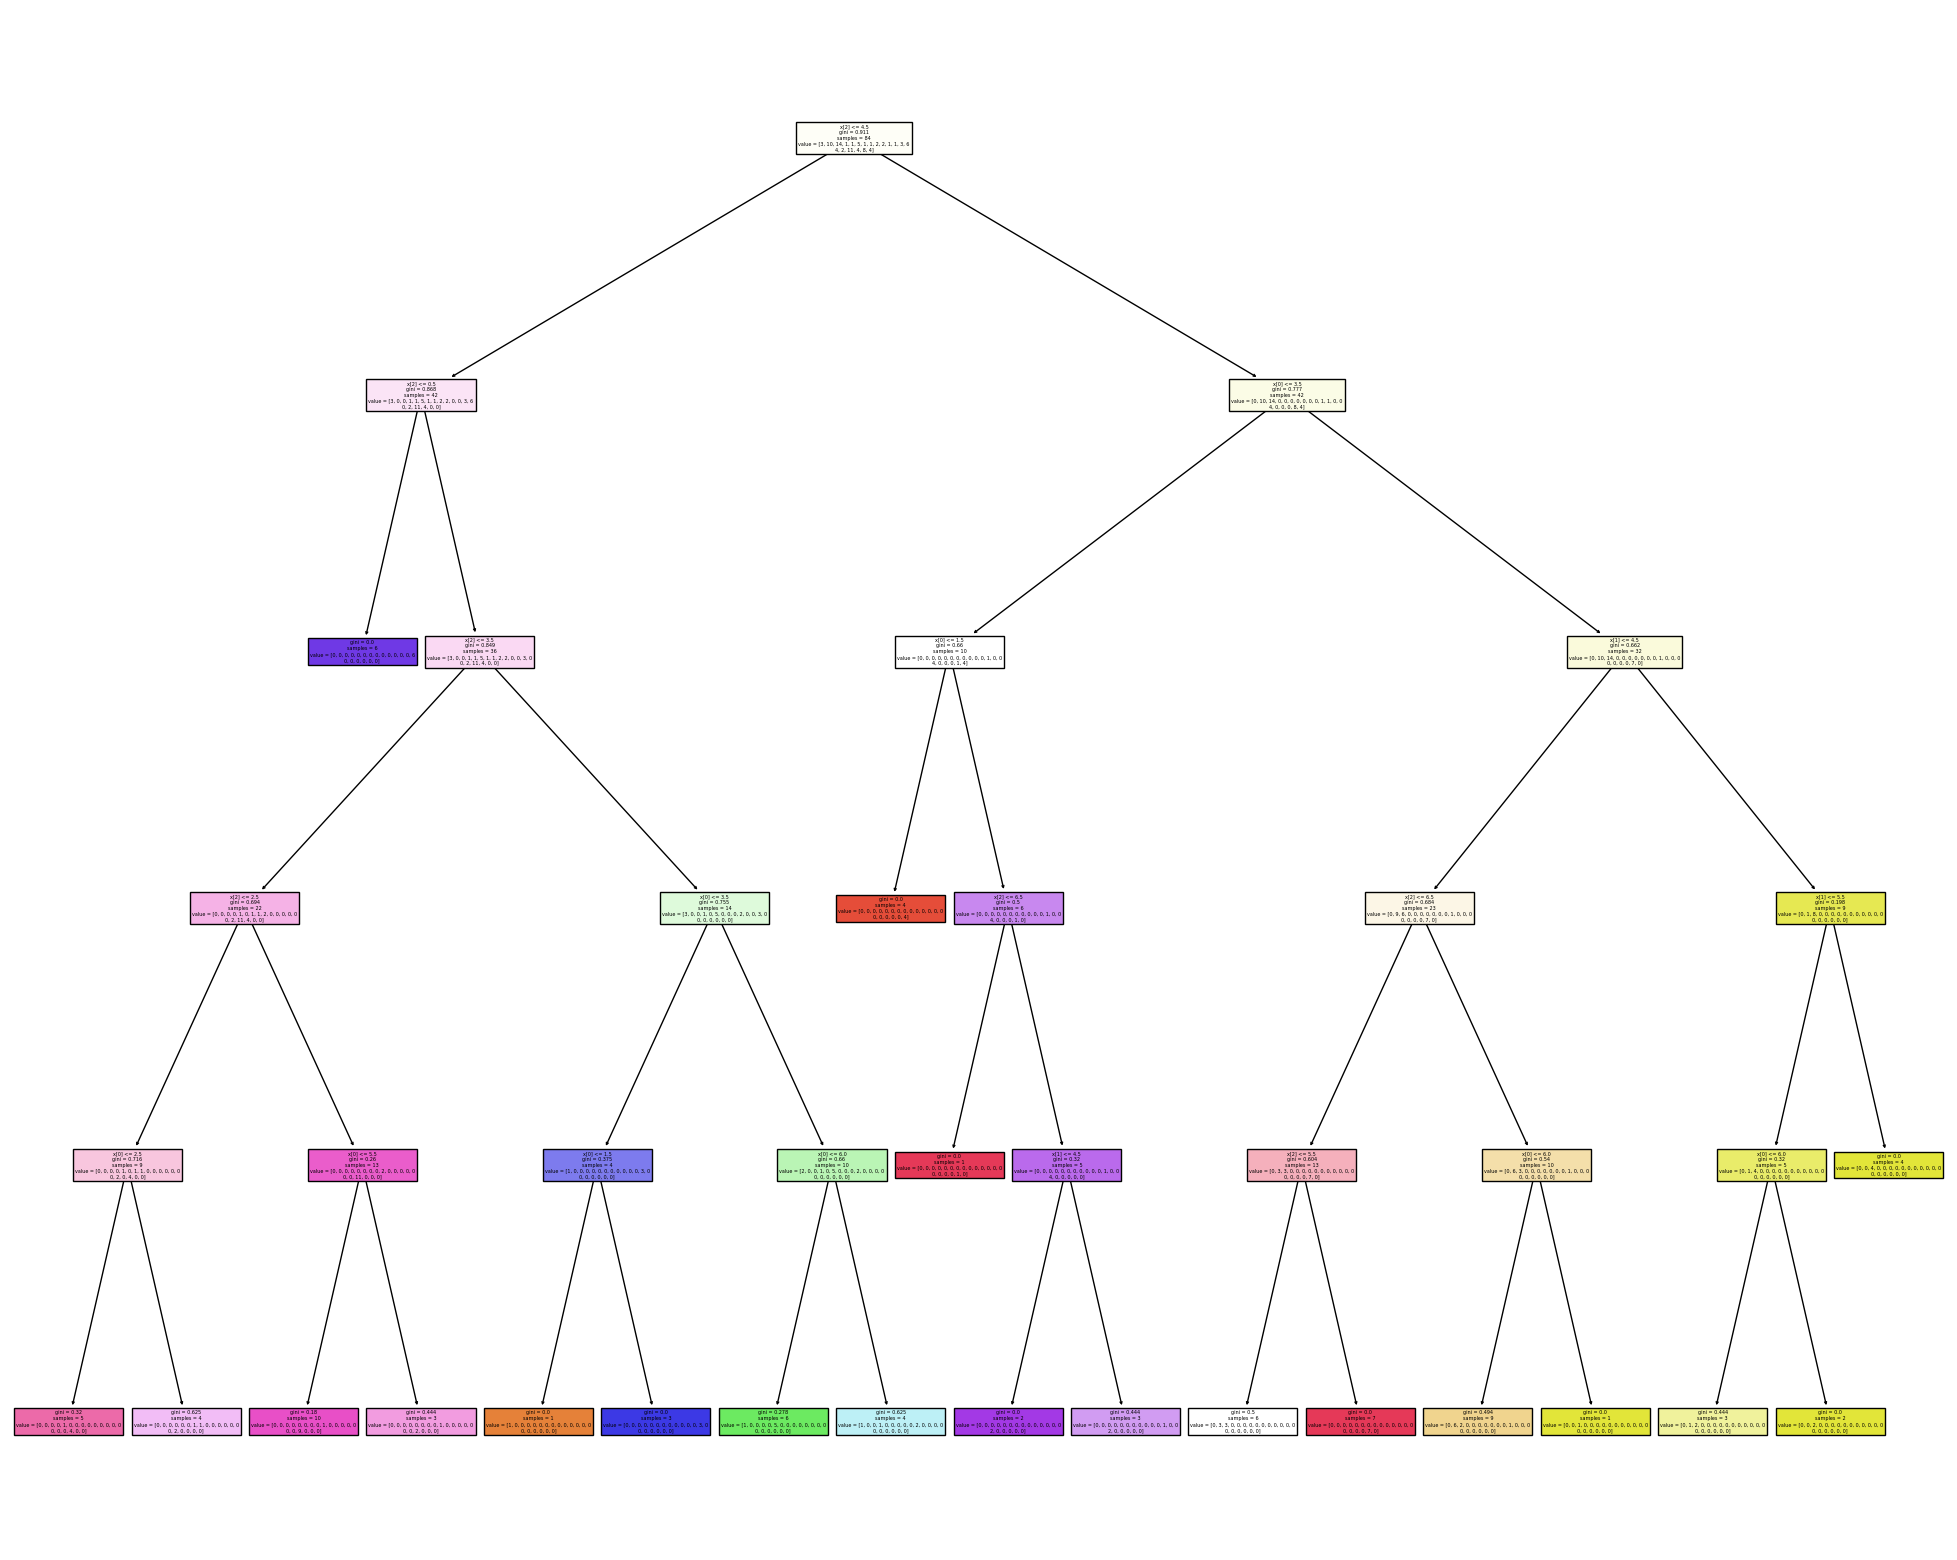

In [211]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)

In [212]:
B_pred = clf.predict(A_test)

In [213]:
acc = accuracy_score(B_test, B_pred)
print("Accuracy:", acc)

Accuracy: 0.6190476190476191


In [214]:
from sklearn.metrics import classification_report

print(classification_report(B_pred,B_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.50      0.33      0.40         3
           5       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       1.00      0.75      0.86         4
          13       0.67      1.00      0.80         2
          15       0.00      0.00      0.00         0
          16       1.00      0.50      0.67         4
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1

    accuracy                           0.62        21
   macro avg       0.55      0.48      0.50        21
weighted avg       0.80      0.62      0.68        21

